In [1]:
import requests as req
import re
from bs4 import BeautifulSoup as bs
import time as ti
import csv
from lxml import etree
import time
import os
import xml.dom.minidom as xmldom
from fontTools.ttLib import TTFont
import operator
import parse
import parsel
from six.moves import urllib
import sys
import pandas as pd
import MaoYanFontRecognize
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

1. Web scraping

In [9]:
def link(url):

    header = {
        "User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3100.0 Safari/537.36",

        "cookie":"__mta=150952457.1632820368758.1634884647679.1635756851389.484; __mta=150952457.1632820368758.1635756851389.1635932418292.485; _lxsdk_cuid=17c2bad9542c8-00489d5a6ba7ac-a7d173c-144000-17c2bad9542c8; __mta=222207655.1632832949226.1633960209698.1633961790468.41; uuid_n_v=v1; uuid=A1925E103BBB11EC82A35568394E37890B684B7C983A486DB094066EA3E3770D; _lxsdk=A1925E103BBB11EC82A35568394E37890B684B7C983A486DB094066EA3E3770D; _csrf=fbed1cebb017d13a1aeebb78eb27259b2f636be482210e2f9f1ef85146f9f7b2; Hm_lvt_703e94591e87be68cc8da0da7cbd0be2=1634884634,1635756851,1635843765,1635929355; __mta=222207655.1632832949226.1633961790468.1635932370661.42; Hm_lpvt_703e94591e87be68cc8da0da7cbd0be2=1635932418; _lxsdk_s=17ce4fcf260-ff6-3d-23e||235"}
    res = req.get(url,headers = header)
    if res.status_code == 200:
        return bs(res.text,"lxml")
    return None


In [3]:
f = open('Xumin.Shen1822556.csv','w',encoding='utf-8')
csv_writer = csv.writer(f)
csv_writer.writerow(["title","Rating","score","Name_of_actors","release_time","Name_of_director","type","duration","cumulative_income"])

97

In [14]:
for j in range(50,100,10):
    url_page = "https://maoyan.com/board/4?offset=" + str(j)
    movies = link(url_page).find_all("dd")
    time.sleep(1)
    for i in movies:
        #ranking
        rank = i.find("i").text
        #title
        title = i.find("a").get("title")
        #name of actors
        actor = re.findall("主演：(.*)",i.find("p",{'class' : "star"}).text)[0]        
        #score
        score = i.find("i",class_ = "integer").text + i.find("i",{'class' : "fraction"}).text
        #movie's links
        url1 = "https://maoyan.com" + i.find("p",{'class' : "name"}).a.get("href")
        movie = link(url1)            
        time.sleep(1)
        #name of directors
        director = movie.find("a",{'class': "name"}).text.replace("\n","").replace(" ","")
        #type
        typee = movie.find("li",{'class' : "ellipsis"}).text.replace("\n","")
        #duration
        ell = movie.find_all('li', {'class': 'ellipsis'})
        duration = ell[1].get_text().split('/')[1].strip().replace('\n', '')  
        #releasetime
        releasetime = ell[2].get_text()
        
        #cumulative income
        piaofang=movie.find("div",{'class':"movie-index-content box"})
        time.sleep(1)
        if piaofang.span['class'] == ['no-info']:#if income not exist
            cul_income = "NA"
            
        else:  #if income exist
            # there are three types of income:"万"，"亿"，"万美元"
            #the first two types can be scraped from below
            #but the third type can only obtained from above and need be deciphered
            income = movie.find_all("div",class_="film-mbox-item")
            t = len(income)
            income0=income[t-1].text.replace("\n","").replace("累计票房","")
            time.sleep(1)
            if "暂无" in income0:
                cul_income = -1#manully input later
                time.sleep(1)
            else:
                if "万" in income0:
                    income1=income0.replace("(万)","")
                    income2=int(income1)
                    income3=income2*10000
                if "亿" in income0:
                    income1=income0.replace("(亿)","")
                    income2=int(income1)
                    income3=income2*100000000
                cul_income=income3
                time.sleep(1)    
       
        csv_writer.writerow([title,rank,score,actor,releasetime,director,typee,duration,cul_income])

In [101]:
ff=open("Xumin.Shen1822556.csv",encoding="utf-8")
movtable=pd.read_csv(ff)
movtable.head()

,title,Rating,score,Name_of_actors,release_time,Name_of_director,type,duration,cumulative_income
0,我不是药神,1,9.6,"徐峥,周一围,王传君",2018-07-05中国大陆上映,文牧野,剧情 喜剧,117分钟,3.100020e+09
1,肖申克的救赎,2,9.5,"蒂姆·罗宾斯,摩根·弗里曼,鲍勃·冈顿",1994-09-13美国上映,弗兰克·德拉邦特,剧情 犯罪,142分钟,NaN
2,绿皮书,3,9.5,"维果·莫腾森,马赫沙拉·阿里,琳达·卡德里尼",2019-03-01中国大陆上映,彼得·法雷里,剧情 喜剧 传记,130分钟,4.787200e+08
3,海上钢琴师,4,9.3,"蒂姆·罗斯,比尔·努恩 ,克兰伦斯·威廉姆斯三世",2019-11-15中国大陆上映,朱塞佩·托纳多雷,剧情 爱情 音乐,126分钟,1.437600e+08
4,哪吒之魔童降世,5,9.6,"吕艳婷,囧森瑟夫,瀚墨",2019-07-26中国大陆上映,饺子,动画 喜剧 奇幻,110分钟,5.035700e+09


2. Visualization 

In [2]:
data_cumulative_income= pd.read_csv(filepath_or_buffer = 'Xumin.Shen1822556.csv', sep = ',')["cumulative_income"].values
data_type= pd.read_csv(filepath_or_buffer = 'Xumin.Shen1822556.csv', sep = ',')["type"].values
data_release_time = pd.read_csv(filepath_or_buffer = 'Xumin.Shen1822556.csv', sep = ',')["release_time"].values

Add the income of unit billion dollors manually

In [3]:
USD2CNY = 6.4
data_cumulative_income[35] = 2330000*USD2CNY
data_cumulative_income[39] = 63100000*USD2CNY
data_cumulative_income[43] = 43980000*USD2CNY
data_cumulative_income[48] = 37030000*USD2CNY
data_cumulative_income[50] = 5320000*USD2CNY
data_cumulative_income[51] = 11290000*USD2CNY
data_cumulative_income[62] = 70000*USD2CNY
data_cumulative_income[65] = 57940000*USD2CNY
data_cumulative_income[74] = 5820000*USD2CNY
data_cumulative_income[75] = 9050000*USD2CNY
data_cumulative_income[78] = 56360000*USD2CNY
data_cumulative_income[79] = 560000*USD2CNY
data_cumulative_income[88] = 3750000*USD2CNY
data_cumulative_income[96] = 7290000*USD2CNY
data_cumulative_income[97] = 53090000*USD2CNY

Figure1: box office vs year (scatter plot)

In [22]:
from datetime import date
date1 = [0]*len(data_release_time)
for i in range(0,len(data_release_time)):
    date1[i]=date.fromisoformat(data_release_time[i][0:10])

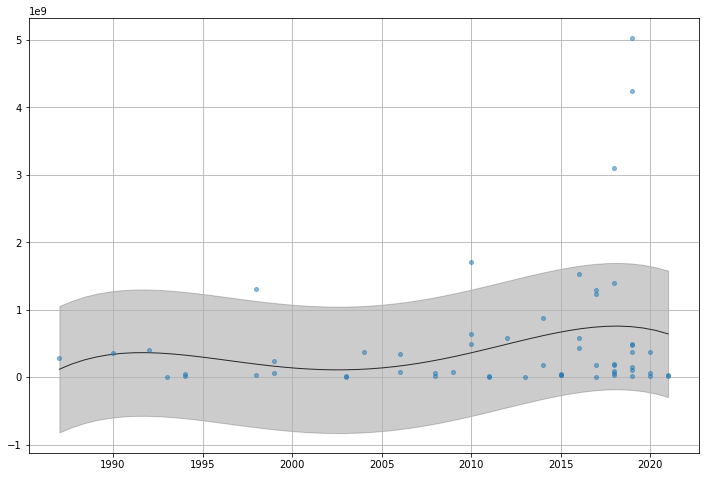

In [20]:
year = [0]*len(data_release_time)
for i in range(0,len(data_release_time)):
    year[i]=data_release_time[i].split('-',2)[0]
nan_index = []
for i in range(0,len(data_cumulative_income)):
    if not np.isnan(data_cumulative_income[i]):
           nan_index.append(i)
data_cumulative_incomeNONAN = []
yearNONAN = []
for i in nan_index:
    data_cumulative_incomeNONAN.append(data_cumulative_income[i])
    yearNONAN.append(year[i])
x = pd.to_numeric(yearNONAN)
y = pd.to_numeric(data_cumulative_incomeNONAN)

params = np.polyfit(x, y, 4)
xp = np.linspace(x.min(), x.max(), 50)
yp = np.polyval(params, xp)#black line: prediction of trend
plt.plot(xp, yp, 'k', alpha=0.8, linewidth=1)
plt.plot(x, y, 'o', markersize=4, alpha=0.5)
sig = np.std(y - np.polyval(params, x))
plt.fill_between(xp, yp - sig, yp + sig, 
                 color='k', alpha=0.2)
plt.grid()
plt.rcParams['figure.figsize'] = (12.0, 8.0) 

Figure 2: box office vs month (radar plot)

In [23]:
month = [0]*len(data_release_time)
for i in range(0,len(data_release_time)):
    month[i]=data_release_time[i].split('-',2)[1]
everyMonth = ['01','02','03','04','05','06','07','08','09','10','11','12']
month_counts = [0]*12
for m in range(0,12):
    for i in range(0,len(month)):
        if everyMonth[m]==month[i]:
            month_counts[m]+=1

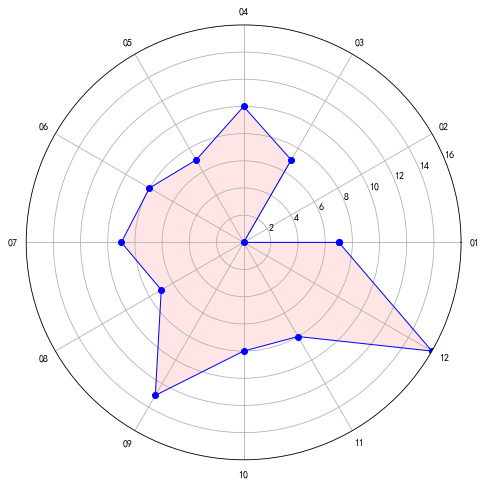

In [40]:
dataLenth = 12
data = month_counts

angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
data = np.concatenate((data, [data[0]]))
angles = np.concatenate((angles, [angles[0]])) 

fig = plt.figure()
ax = fig.add_subplot(121, polar=True)
ax.plot(angles, data, 'bo-', linewidth=1)
ax.fill(angles, data, facecolor='r', alpha=0.1)
ax.set_thetagrids(angles[:12] * 180/np.pi,everyMonth)
#ax.set_title
ax.set_rlim(0,16)
ax.grid(True)
plt.show()

Figure 3: box office vs month (box + scatter plot)

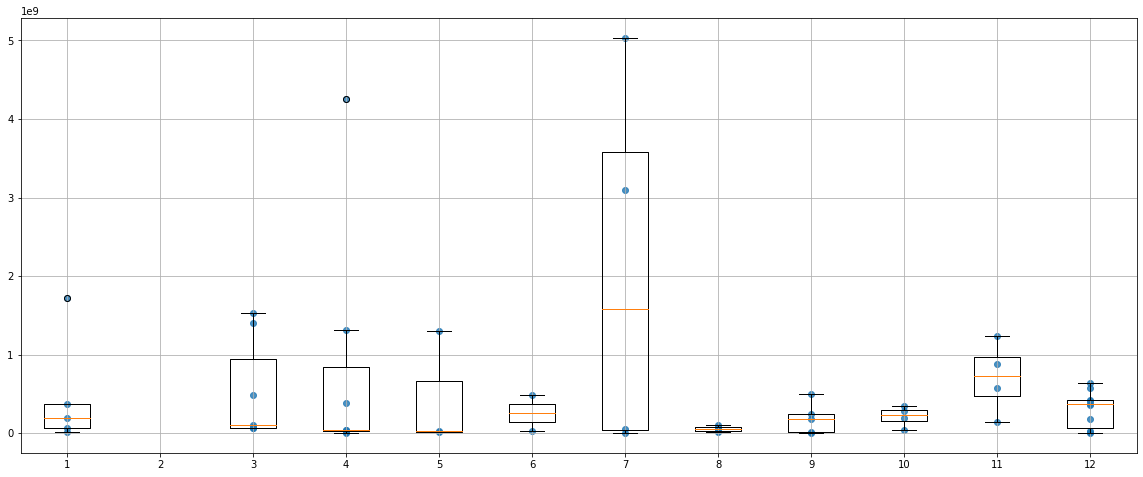

In [33]:
month = []

for i in range(0,len(data_release_time)):
    month.append(date1[i].month)
allMs = [1,2,3,4,5,6,7,8,9,10,11,12]    


index = [[] for _ in range(len(month))]    
box = [[] for _ in range(len(allMs))]
for i in range(0,len(allMs)):
    for j in range(0,len(month)):
        if month[j]==allMs[i] and (not np.isnan(data_cumulative_income[j])):
            box[i].append(data_cumulative_income[j])

            
plt.scatter(month, data_cumulative_income,alpha=0.8)            

            
plt.boxplot(
    x=box,
    labels=allMs)

plt.grid()
plt.rcParams['figure.figsize'] = (20.0, 8.0)


Figure 4: box plot of movies' types

In [35]:
import matplotlib as mpl
mpl.rcParams['font.family']='SimHei'
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=True

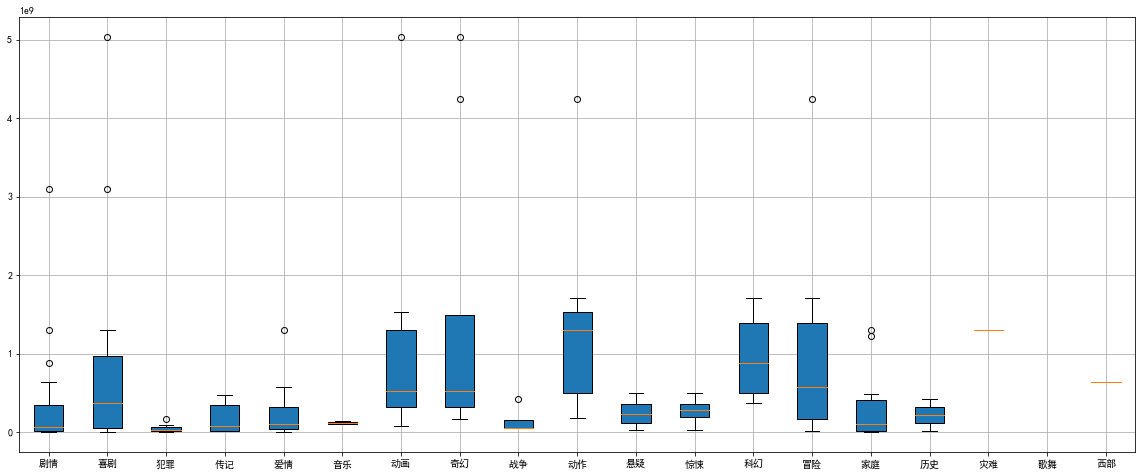

In [36]:
type = [0]*len(data_type)
for i in range(0,len(data_type)):
    type[i] = data_type[i].split()

allTypes = []
for i in range(0,len(type)):
    for j in range(0,len(type[i])):
        if not(type[i][j]in allTypes):
            allTypes.append(type[i][j])

box_0 = [[] for _ in range(len(allTypes))]
index = [[] for _ in range(len(allTypes))]
index
for i in  range(0,len(allTypes)):
    for j in range(0,len(type)):
        index[i].append(allTypes[i] in type[j])
import numpy as np
import matplotlib as mpl
mpl.rcParams['font.family']='SimHei'
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False
for i in range(0,len(allTypes)):
    for j in range(0,len(type)):
        if index[i][j] and (not np.isnan(data_cumulative_income[j])):
            box_0[i].append(data_cumulative_income[j])
plt.boxplot(
    x=box_0,
    patch_artist=True,
    labels=allTypes)
plt.rcParams['figure.figsize'] = (20.0, 8.0)
plt.grid()

Figure 5: stacked bar plot of different types' movies in different years

In [13]:
numYear = pd.to_numeric(year)
numAllYears = pd.to_numeric(allYears)

In [27]:
proportions = [[0]*7 for _ in range(0,len(allTypes))]  
movies_period = [0]*7
for i in range(0,len(year)):
    if numYear[i] <= 1991:
        movies_period[0]+=1
        for j in range(0,len(allTypes)):
            if allTypes[j] in type[i]:
                proportions[j][0] +=1
period = np.linspace(1991, 2021, 7)

for time_period in  range (0,7):
    for i in range(0,len(year)):
        if numYear[i] > period[time_period] and numYear[i] <= period[time_period+1]:
            movies_period[time_period+1]+=1
            for j in range(0,len(allTypes)):
                if allTypes[j] in type[i]:
                    proportions[j][time_period+1] +=1

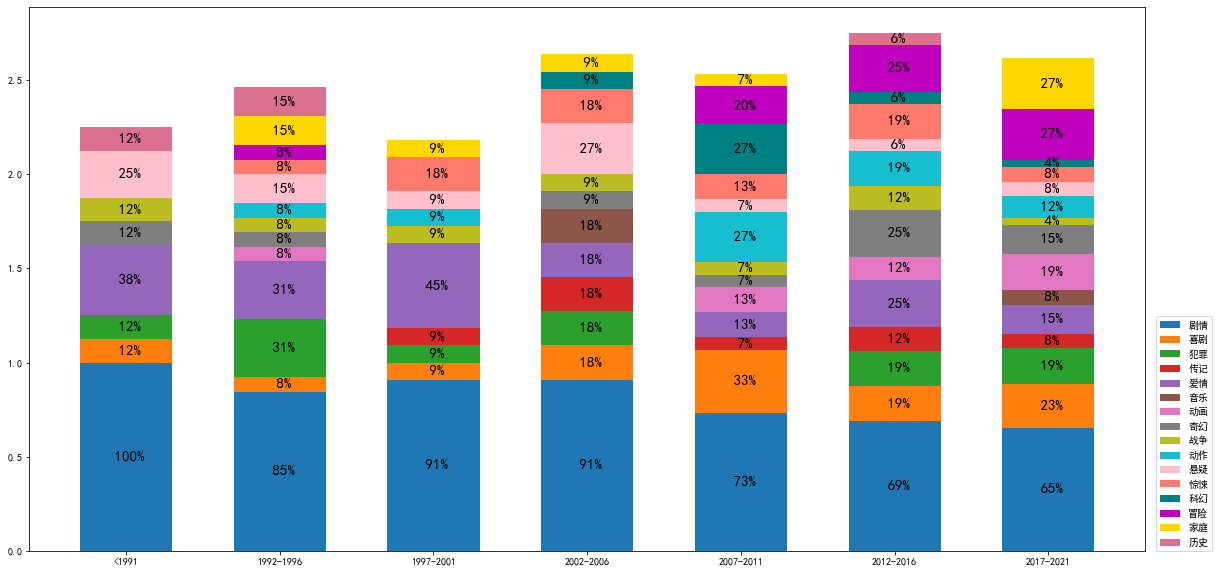

In [21]:
numProportions = np.array(proportions)
Realproportions = [[0]*7 for _ in range(0,len(allTypes))] 
colorlist = [[] for _ in range(19)]
base_colors=list(mcolors.BASE_COLORS.keys())
TABLEAU_colors=list(mcolors.TABLEAU_COLORS.keys())
for i in range(0,16):
        if i < 10:
             colorlist[i]=mcolors.TABLEAU_COLORS[TABLEAU_colors[i]]
        else:
             colorlist[i]=mcolors.BASE_COLORS[base_colors[i-9]]
colorlist[11] = '#ff796c'
colorlist[12] = '#008080'
colorlist[15] = '#DB7093'
colorlist[14] = '#FFD700'
colorlist[10] = '#FFC0CB'

import matplotlib.colors as mcolors
base_colors=list(mcolors.BASE_COLORS.keys())
TABLEAU_colors=list(mcolors.TABLEAU_COLORS.keys())
for i in range(0,len(allTypes)):
    Realproportions[i] = numProportions[i]/movies_period
time = ["<1991","1992-1996","1997-2001","2002-2006","2007-2011","2012-2016","2017-2021"]
numProportions = np.array(proportions)
bottomArray = [np.array([0.0]*7)for _ in range(0,len(allTypes))] 
for i in range(0,len(allTypes[:16])):
    plt.bar(time, # 横坐标
        Realproportions[i], # 柱⾼
        bottom=bottomArray[i],         
        color = colorlist[i],
        width=0.6, # 线宽
        label=allTypes[i])#标签
    bottomArray[i+1] = Realproportions[i]+bottomArray[i]
    
    #for a, b, c  in zip(time, bottomArray,Realproportions[i]):
    #    if not c == 0.0:
    #         plt.text(a, b, ' {:.0%}'.format(c), ha='center', va='top', fontsize=15)
    for j in range(0,len(time)):
        if not Realproportions[i][j] == 0.0:
               plt.text(time[j], (bottomArray[i][j]+bottomArray[i+1][j])/2, ' {:.0%}'.format(Realproportions[i][j]), ha='center', va='center', fontsize=15) 
plt.legend(bbox_to_anchor=(1.01, 0), loc=3, borderaxespad=0)

The End